### <i>Filipe de Paula Oliveira</i>

# <font color = red>Análise de Satisfação do Cliente do Santander</font>

#### Projeto Prático 03 da Formação Cientista de Dados da Data Science Academy

Problema: Identificar se um cliente está satisfeito ou insatisfeito com o relacionamento com o Santander. É interessante que isso ocorra cedo no relacionamento com o cliente, antes mesmo dele relatar algum problema, para que se possa agir antes que ele encerre sua conta.

O dataset fornecido contem centenas de variáveis anônimizadas, e uma variável TARGET, em que: 1 = cliente insatisfeito e 0 =  cliente satisfeito

## 0 Instalação de alguns pacotes <a name="0"></a>

In [1]:
# !pip install imblearn
# !pip install xgboost

## 1 Importação de pacotes

### 1.1 Leitura e Manipulação de Dados

In [2]:
import pandas as pd

### 1.2 Análise Exploratória

In [3]:
import matplotlib.pyplot as plt

### 1.3 Pré-Processamento

In [4]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### 1.4 Machine Learning

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

### 1.5 Métricas

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from xgboost import plot_importance

### 1.6 Ignorando Warnings

In [7]:
import warnings
warnings.filterwarnings("ignore")

## 2 Leitura do dataset

In [8]:
df_orig = pd.read_csv('santander-customer-satisfaction/train.csv')


## 3 Análise Exploratória

In [9]:
df_orig.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
df_orig.shape

(76020, 371)

371 colunas! Dificulta bastante a análise gráfica.

### 3.1 Distribuição da variável target

In [11]:
df_orig['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

##### O dataset é bem desbalanceado (~3% da classe 1 e ~97% da classe 0)

### 3.2 Verificando se há valores NA

In [12]:
df_orig.isnull().values.any()

False

## 4 Pré Processamento

### 4.1 Padronização

In [13]:
scaler = StandardScaler()
scaler.fit(df_orig.values[:,0:len(df_orig.columns)-1])

rescaled_values = scaler.transform(df_orig.values[:,0:len(df_orig.columns)-1])
df_padr = pd.DataFrame(rescaled_values)
df_padr['TARGET'] = df_orig['TARGET']
df_padr.head()

,0,1,2,3,4,5,6,7,8,9,...,361,362,363,364,365,366,367,368,369,TARGET
0,-1.735043,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.427183,0
1,-1.734997,0.039074,0.060753,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.372038,0
2,-1.734974,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.273191,0
3,-1.734883,0.039074,0.292298,-0.053388,0.361427,0.138158,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,-0.291398,0
4,-1.734837,0.039074,0.446662,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.017408,-0.011979,-0.015597,-0.016314,-0.01565,-0.012576,-0.018817,-0.019847,0.000412,0


### 4.2 Resampling

In [14]:
seed = 1234
X_treino_prep, X_teste_prep, Y_treino_prep, Y_teste_prep = train_test_split(df_padr.values[:,0:len(df_padr.columns)-1],
                                                                            df_padr.values[:,len(df_padr.columns)-1],
                                                                            test_size = 0.3,
                                                                            random_state = seed)

### 4.3 Balanceamento de classes (SMOTE)

In [15]:
SM = SMOTE(random_state = seed, n_jobs = -1)
X_treino_balanc, Y_treino_balanc = SM.fit_resample(X_treino_prep, Y_treino_prep)
X_teste_balanc, Y_teste_balanc = SM.fit_resample(X_teste_prep, Y_teste_prep)

### 4.4 Principal Component Analysis (PCA)

In [16]:
pca = PCA(0.95)
pca_fit = pca.fit(X_treino_balanc)

#### 4.4.1 Porcentagem da variância presente nos componentes

In [17]:
print(pca_fit.explained_variance_ratio_.sum())

0.9504639167432769


#### 4.4.2 Dados de treino com o PCA

In [18]:
pca_values_train = pca_fit.transform(X_treino_balanc)
df_train = pd.DataFrame(pca_values_train)
df_train['TARGET'] = Y_treino_balanc
df_train.shape

(102222, 93)

#### 4.4.3 Dados de teste com o PCA

In [19]:
pca_values_test = pca_fit.transform(X_teste_balanc)
df_test = pd.DataFrame(pca_values_test)
df_test['TARGET'] = Y_teste_balanc
df_test.shape

(43802, 93)

### 4.5 X e Y split

In [20]:
df_train_X = df_train.values[:,0:len(df_train.columns)-1]
df_train_Y = df_train.values[:,len(df_train.columns)-1]
df_test_X = df_test.values[:,0:len(df_test.columns)-1]
df_test_Y = df_test.values[:,len(df_test.columns)-1]

## 5 Machine Learning

Nessa seção serão rodados os algoritmos um por um. Na seção 6 há um Pipeline automatizando para todos os algoritmos.

### 5.1 Regressão Logística

In [21]:
modelo_lr = LogisticRegression(random_state = seed)
modelo_lr.fit(df_train_X, df_train_Y)

LogisticRegression(random_state=1234)

#### 5.1.1 Resultados Regressão Logística

In [22]:
previsoes_lr_train = modelo_lr.predict(df_train_X)
print("Confusion Matrix nos Dados de Treino")
print(confusion_matrix(previsoes_lr_train, df_train_Y))
print(classification_report(df_train_Y, previsoes_lr_train))
acc_lr_train = accuracy_score(df_train_Y, previsoes_lr_train)
auc_lr_train = roc_auc_score(df_train_Y, modelo_lr.predict_proba(df_train_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_lr_train, auc_lr_train))

Confusion Matrix nos Dados de Treino
[[35851 12454]
 [15260 38657]]
              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72     51111
         1.0       0.72      0.76      0.74     51111

    accuracy                           0.73    102222
   macro avg       0.73      0.73      0.73    102222
weighted avg       0.73      0.73      0.73    102222

O modelo teve 72.89% de precisão e 80.94% de AUC nos dados de treino.


In [23]:
previsoes_lr_test = modelo_lr.predict(df_test_X)
print("Confusion Matrix nos Dados de Teste")
print(confusion_matrix(previsoes_lr_test, df_test_Y)) 
print(classification_report(df_test_Y, previsoes_lr_test))
acc_lr_test = accuracy_score(df_test_Y, previsoes_lr_test)
auc_lr_test = roc_auc_score(df_test_Y, modelo_lr.predict_proba(df_test_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_lr_test, auc_lr_test))

Confusion Matrix nos Dados de Teste
[[15341  5826]
 [ 6560 16075]]
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71     21901
         1.0       0.71      0.73      0.72     21901

    accuracy                           0.72     43802
   macro avg       0.72      0.72      0.72     43802
weighted avg       0.72      0.72      0.72     43802

O modelo teve 71.72% de precisão e 79.19% de AUC nos dados de teste.


## 5.2 Naive Bayes

In [24]:
modelo_nb = GaussianNB()
modelo_nb.fit(df_train_X, df_train_Y)

GaussianNB()

#### 5.2.1 Resultados Naive Bayes

In [25]:
previsoes_nb_train = modelo_nb.predict(df_train_X)
print("Confusion Matrix nos Dados de Treino") 
print(confusion_matrix(previsoes_nb_train, df_train_Y))
print(classification_report(df_train_Y, previsoes_nb_train))
acc_nb_train = accuracy_score(df_train_Y, previsoes_nb_train)
auc_nb_train = roc_auc_score(df_train_Y, modelo_nb.predict_proba(df_train_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_nb_train, auc_nb_train))

Confusion Matrix nos Dados de Treino
[[ 7721  3422]
 [43390 47689]]
              precision    recall  f1-score   support

         0.0       0.69      0.15      0.25     51111
         1.0       0.52      0.93      0.67     51111

    accuracy                           0.54    102222
   macro avg       0.61      0.54      0.46    102222
weighted avg       0.61      0.54      0.46    102222

O modelo teve 54.21% de precisão e 54.38% de AUC nos dados de treino.


In [26]:
previsoes_nb_test = modelo_nb.predict(df_test_X)
print("Confusion Matrix nos Dados de Teste")
print(confusion_matrix(previsoes_nb_test, df_test_Y))
print(classification_report(df_test_Y, previsoes_nb_test))
acc_nb_test = accuracy_score(df_test_Y, previsoes_nb_test)
auc_nb_test = roc_auc_score(df_test_Y, modelo_nb.predict_proba(df_test_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_nb_test, auc_nb_test))

Confusion Matrix nos Dados de Teste
[[ 3288  1591]
 [18613 20310]]
              precision    recall  f1-score   support

         0.0       0.67      0.15      0.25     21901
         1.0       0.52      0.93      0.67     21901

    accuracy                           0.54     43802
   macro avg       0.60      0.54      0.46     43802
weighted avg       0.60      0.54      0.46     43802

O modelo teve 53.87% de precisão e 54.18% de AUC nos dados de teste.


### 5.3 CART

In [27]:
modelo_cart = DecisionTreeClassifier(max_depth=4, random_state = seed)
modelo_cart.fit(df_train_X, df_train_Y)

DecisionTreeClassifier(max_depth=4, random_state=1234)

#### 5.3.1 Resultados CART

In [28]:
previsoes_cart_train = modelo_cart.predict(df_train_X)
print("Confusion Matrix nos Dados de Treino")
print(confusion_matrix(previsoes_cart_train, df_train_Y))
print(classification_report(df_train_Y, previsoes_cart_train))
acc_cart_train = accuracy_score(df_train_Y, previsoes_cart_train)
auc_cart_train = roc_auc_score(df_train_Y, modelo_cart.predict_proba(df_train_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_cart_train, auc_cart_train))

Confusion Matrix nos Dados de Treino
[[37403 13321]
 [13708 37790]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73     51111
         1.0       0.73      0.74      0.74     51111

    accuracy                           0.74    102222
   macro avg       0.74      0.74      0.74    102222
weighted avg       0.74      0.74      0.74    102222

O modelo teve 73.56% de precisão e 80.93% de AUC nos dados de treino.


In [29]:
previsoes_cart_test = modelo_cart.predict(df_test_X)
print("Confusion Matrix nos Dados de Teste")
print(confusion_matrix(previsoes_cart_test, df_test_Y))
print(classification_report(df_test_Y, previsoes_cart_test))
acc_cart_test = accuracy_score(df_test_Y, previsoes_cart_test)
auc_cart_test = roc_auc_score(df_test_Y, modelo_cart.predict_proba(df_test_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_cart_test, auc_cart_test))

Confusion Matrix nos Dados de Teste
[[16000  6446]
 [ 5901 15455]]
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72     21901
         1.0       0.72      0.71      0.71     21901

    accuracy                           0.72     43802
   macro avg       0.72      0.72      0.72     43802
weighted avg       0.72      0.72      0.72     43802

O modelo teve 71.81% de precisão e 79.17% de AUC nos dados de teste.


### 5.4 Random Forest

In [30]:
# RandomForest
modelo_rf = RandomForestClassifier(max_depth=4, random_state = seed)
modelo_rf.fit(df_train_X, df_train_Y)

RandomForestClassifier(max_depth=4, random_state=1234)

#### 5.4.1 Resultados Random Forest

In [31]:
previsoes_rf_train = modelo_rf.predict(df_train_X)
print("Confusion Matrix nos Dados de Treino")
print(confusion_matrix(previsoes_rf_train, df_train_Y))
print(classification_report(df_train_Y, previsoes_rf_train))
acc_rf_train = accuracy_score(df_train_Y, previsoes_rf_train)
auc_rf_train = roc_auc_score(df_train_Y, modelo_rf.predict_proba(df_train_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_rf_train, auc_rf_train))

Confusion Matrix nos Dados de Treino
[[42947 17859]
 [ 8164 33252]]
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77     51111
         1.0       0.80      0.65      0.72     51111

    accuracy                           0.75    102222
   macro avg       0.75      0.75      0.74    102222
weighted avg       0.75      0.75      0.74    102222

O modelo teve 74.54% de precisão e 83.43% de AUC nos dados de treino.


In [32]:
previsoes_rf_test = modelo_rf.predict(df_test_X)
print("Confusion Matrix nos Dados de Teste")
print(confusion_matrix(previsoes_rf_test, df_test_Y))
print(classification_report(df_test_Y, previsoes_rf_test))
acc_rf_test = accuracy_score(df_test_Y, previsoes_rf_test)
auc_rf_test = roc_auc_score(df_test_Y, modelo_rf.predict_proba(df_test_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_rf_test, auc_rf_test))

Confusion Matrix nos Dados de Teste
[[18382  8389]
 [ 3519 13512]]
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76     21901
         1.0       0.79      0.62      0.69     21901

    accuracy                           0.73     43802
   macro avg       0.74      0.73      0.72     43802
weighted avg       0.74      0.73      0.72     43802

O modelo teve 72.81% de precisão e 81.63% de AUC nos dados de teste.


### 5.5 XGBoost

In [33]:
modelo_xgb = XGBClassifier(verbosity = 0, random_state = seed)
modelo_xgb.fit(df_train_X, df_train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

#### 5.5.1 Resultados XGB

In [34]:
previsoes_xgb_train = modelo_xgb.predict(df_train_X)
print("Confusion Matrix nos Dados de Treino")
print(confusion_matrix(previsoes_xgb_train, df_train_Y))
print(classification_report(df_train_Y, previsoes_xgb_train))
acc_xgb_train = accuracy_score(df_train_Y, previsoes_xgb_train)
auc_xgb_train = roc_auc_score(df_train_Y, modelo_xgb.predict_proba(df_train_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(acc_xgb_train, auc_xgb_train))

Confusion Matrix nos Dados de Treino
[[45784  1424]
 [ 5327 49687]]
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93     51111
         1.0       0.90      0.97      0.94     51111

    accuracy                           0.93    102222
   macro avg       0.94      0.93      0.93    102222
weighted avg       0.94      0.93      0.93    102222

O modelo teve 93.40% de precisão e 97.87% de AUC nos dados de treino.


In [35]:
previsoes_xgb_test = modelo_xgb.predict(df_test_X)
print("Confusion Matrix nos Dados de Teste")
print(confusion_matrix(previsoes_xgb_test, df_test_Y))
print(classification_report(df_test_Y, previsoes_xgb_test))
acc_xgb_test = accuracy_score(df_test_Y, previsoes_xgb_test)
auc_xgb_test = roc_auc_score(df_test_Y, modelo_xgb.predict_proba(df_test_X)[:,1])
print('O modelo teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(acc_xgb_test, auc_xgb_test))

Confusion Matrix nos Dados de Teste
[[18934  9223]
 [ 2967 12678]]
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.76     21901
         1.0       0.81      0.58      0.68     21901

    accuracy                           0.72     43802
   macro avg       0.74      0.72      0.72     43802
weighted avg       0.74      0.72      0.72     43802

O modelo teve 72.17% de precisão e 81.82% de AUC nos dados de teste.


## 6 Automatizando com Pipeline

In [36]:
pipe_list = [
    [('pca',PCA(0.95)), ('Logistic Regression', LogisticRegression(random_state = seed))],
    [('pca',PCA(0.95)), ('Naive Bayes', GaussianNB())],
    [('pca',PCA(0.95)), ('CART', DecisionTreeClassifier(max_depth=4,random_state = seed))],
    [('pca',PCA(0.95)), ('Random Forest', RandomForestClassifier(max_depth=4,random_state = seed))],
    [('pca',PCA(0.95)), ('XGBoost', XGBClassifier(verbosity = 0,random_state = seed))]
]

for pipes in pipe_list:
    pipe = Pipeline([pipes[0], pipes[1]])
    pipe.fit(X_treino_balanc, Y_treino_balanc)
    print('O modelo {} teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(
        pipes[1][0],
        accuracy_score(Y_teste_balanc, pipe.predict(X_teste_balanc)),
        roc_auc_score(Y_teste_balanc, pipe.predict_proba(X_teste_balanc)[:,1]))
         )

O modelo Logistic Regression teve 71.72% de precisão e 79.19% de AUC nos dados de teste.
O modelo Naive Bayes teve 53.87% de precisão e 54.18% de AUC nos dados de teste.
O modelo CART teve 71.81% de precisão e 79.17% de AUC nos dados de teste.
O modelo Random Forest teve 72.81% de precisão e 81.63% de AUC nos dados de teste.
O modelo XGBoost teve 72.17% de precisão e 81.82% de AUC nos dados de teste.


## 7 Comparação entre modelos

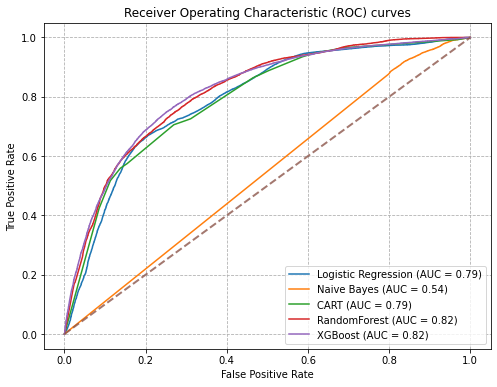

In [56]:
model_list = [
    (modelo_lr, 'Logistic Regression'),
    (modelo_nb, 'Naive Bayes'),
    (modelo_cart, 'CART'),
    (modelo_rf, 'RandomForest'),
    (modelo_xgb, 'XGBoost')
]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for model, name in model_list:
    plot_roc_curve(model, df_test_X, df_test_Y, ax=ax, name = name)
ax.set_title('Receiver Operating Characteristic (ROC) curves')

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, label=None, alpha=.8)
ax.grid(linestyle='--')
plt.show()

## 8 Tuning do XGBoost

Como obteve a melhor AUC, métrica utilizada na avaliação da competição, será otimizado um modelo XGBoost com a métrica roc_auc usando CV de 5-fold.

In [38]:
pipe_xgb = Pipeline([
    ('pca', PCA(0.95)),
    ('xgb', XGBClassifier(verbosity = 0))
])

### 8.1 Parâmetros a serem testados

In [39]:
parametros_teste = {
    'xgb__gamma'            : [0.0, 0.1, 0.2 , 0.3, 0.4],
    'xgb__learning_rate'    : [0.05, 0.10, 0.15, 0.20, 0.25],
    'xgb__min_child_weight' : [1, 3, 5],
    'xgb__max_depth'        : [3, 4, 5, 6, 8, 10],
    'xgb__colsample_bytree' : [0.3, 0.4, 0.5 , 0.7]
}

### 8.2 Usando o RandomizedSearchCV para testar outras combinações dos parâmetros

In [40]:
final_model_CV = RandomizedSearchCV(estimator=pipe_xgb, param_distributions=parametros_teste, cv=5, n_jobs=-1,
                                      scoring='roc_auc', n_iter=10)

In [41]:
final_model_CV.fit(X_treino_balanc, Y_treino_balanc)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(n_components=0.95)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                            

### 8.3 Previsões Finais

In [42]:
prevs_train_final = final_model_CV.predict(X_treino_balanc)
prevs_test_final = final_model_CV.predict(X_teste_balanc)
probs_train_final = final_model_CV.predict_proba(X_treino_balanc)[:,1]
probs_test_final = final_model_CV.predict_proba(X_teste_balanc)[:,1]

### 8.4 Métricas de Resultado

In [43]:
pipe_acc_train = accuracy_score(Y_treino_balanc, prevs_train_final)
pipe_acc_test = accuracy_score(Y_teste_balanc, prevs_test_final)
pipe_auc_train = roc_auc_score(Y_treino_balanc, probs_train_final)
pipe_auc_test = roc_auc_score(Y_teste_balanc, probs_test_final)

### 8.5 Melhor modelo

In [44]:
final_model_CV.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.25,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=0))])

### 8.6 Importância das Features

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

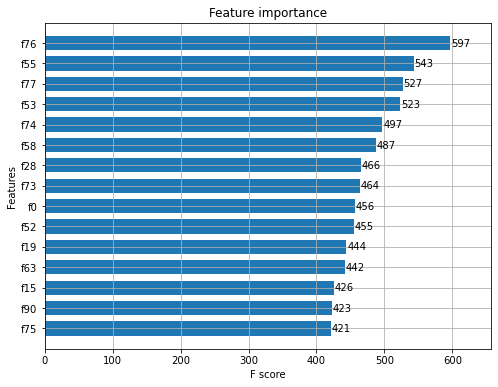

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_importance(final_model_CV.best_estimator_['xgb'], ax=ax, height=0.7, max_num_features=15)

## 9 Resultados

### 9.1 Métricas principais da análise (Accuracy e AUC)

In [46]:
print('O modelo XGBoost com tuning teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de treino.'.format(pipe_acc_train,
                                                                                                         pipe_auc_train))
print('O modelo XGBoost com tuning teve {:2.2%} de precisão e {:2.2%} de AUC nos dados de teste.'.format(pipe_acc_test,
                                                                                                         pipe_auc_test))   

O modelo XGBoost com tuning teve 98.88% de precisão e 99.96% de AUC nos dados de treino.
O modelo XGBoost com tuning teve 67.02% de precisão e 82.03% de AUC nos dados de teste.


### 9.2 Confusion Matrix

In [47]:
print("Treino")
print(confusion_matrix(prevs_train_final, Y_treino_balanc))
print("\nTeste")
print(confusion_matrix(prevs_test_final, Y_teste_balanc))

Treino
[[50097   131]
 [ 1014 50980]]

Teste
[[20145 12688]
 [ 1756  9213]]


### 9.3 Classification Report

In [48]:
print("Treino")
print(classification_report(Y_treino_balanc, prevs_train_final))
print("\nTeste")
print(classification_report(Y_teste_balanc, prevs_test_final))

Treino
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     51111
         1.0       0.98      1.00      0.99     51111

    accuracy                           0.99    102222
   macro avg       0.99      0.99      0.99    102222
weighted avg       0.99      0.99      0.99    102222


Teste
              precision    recall  f1-score   support

         0.0       0.61      0.92      0.74     21901
         1.0       0.84      0.42      0.56     21901

    accuracy                           0.67     43802
   macro avg       0.73      0.67      0.65     43802
weighted avg       0.73      0.67      0.65     43802



### 9.4 ROC Curve

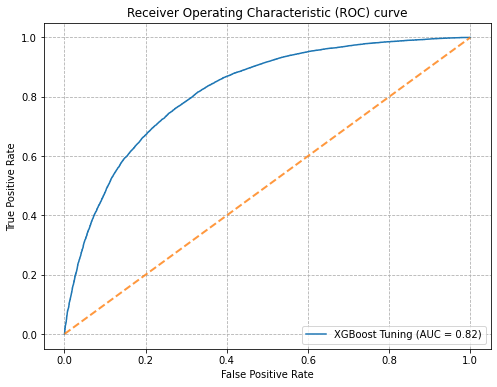

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_roc_curve(final_model_CV, X_teste_balanc, Y_teste_balanc, ax=ax, name = 'XGBoost Tuning')
ax.set_title('Receiver Operating Characteristic (ROC) curve')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, label=None, alpha=.8)
ax.grid(linestyle='--')
plt.show()